# Homework 5: 

**DUE:** 5pm EST, March 17, 2020

<br>

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose that we have a dataset with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response variable ($Y$) is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0}$ =50, $\hat{\beta_1}$ =20, $\hat{\beta_2}$ =0.07, $\hat{\beta_3}$ =35, $\hat{\beta_4}$ =0.01, $\hat{\beta_5}$ =-10.

<br>
    
_(a) Which answer is correct, and why?_

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

**Answer:**
iii is correct.
The interaction coefficient about $gpa*gender$ is $-10*gpa*gender$ for women.
So when iq is 100:
- Ywomen = $(50+35)$ + $(20+1-10)*gpa = 92+11*gpa$
- Ymen = $(50+7)$ + $(20+1)*gpa = 57+21*gpa$
<br>As you can see, men tend to earn higher than women when gpa is higher than 3.5.</br>

<br>

_(b) Predict the salary of a female graduate with IQ of 110 and a GPA of 4.0._


**Answer:**
<br> Ywomen = 137.1 </br>


<br>

_(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer._

**Answer:**
False, it's depends on the p-value rather than the coefficient itself.

---

2. What are high leverage observations? How do they impact your model fits? What assumption of linear regression do they violate?

**Answer:**
High leverage observations are those observations that be made at outlying values of the independent variables with less neighbors. However, they have big impact on the estimated model with other observations.
This one violates the assumption that observations should be distributed in a reasonable way.

---

3. A linear mixed effect model has the form $Y = X\beta + Z\upsilon + \epsilon$. 

<br>

_(a) What are the assumptions about $Z$ and $\upsilon$ that make this different from using a regular control variable in a simple linear regression model?_

**Answer:** 
- Have interpretable and meaningful relationship to the dependent variable
- The cofficient for this variable also can be interpreted and understood based on theory and empirical evidence.

<br>

_(b) What is the objective function for this model (i.e., the function that needs to be minimized to find the optimal parameters) and how is it different than the objective function for the ordinary least squares model?_


**Answer:**
- The linear mixed effects objective function covers the covariance matrix of the random effeect and also adds a penalty factor.
- The linear regression objective function only aims at minizing the MSE.

<br>

_(c) What advantage does including a random effects term in your model give you with regards to understanding the fixed effects relationship?_

**Answer:**
It covers the effects that are not of primary research interest but still might impact on the dependent variable.

<br>

_(d) Which of these variables would be considered random factors?_

* Age
* Subject ID
* Classroom number
* Gender
* Reaction Time
* JPEG image filename
* Time of day

**Answer:**
* Subject ID
* Classroom number
* JPEG image filename
<br>Those are of less meaning to the dependent variable</br>

---

### **Applied:** Show your code & plots

We will use both datasets from the CRAN universe and the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells.

---

4. Load the cbpp dataset from the lme4 library. Run ?cbpp after loading the lme4 library to get information on the dataset.

(a) Plot the relationship between herd size and CBPP incidence


In [6]:
# -------------------------------
# Question 4
# -------------------------------
#install.packages("lme4")
library(lme4)
?cbpp
attach(cbpp)
plot(size,incidence)

also installing the dependency ‘nloptr’

Warning message in install.packages("lme4"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("lme4"):
“installation of package ‘lme4’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(lme4): there is no package called ‘lme4’



(b) Use the lm function to model the effect of herd size (predictor) on CBPP incidence (response). How does herd size impact disease rate? Report the results of the model.


In [3]:
# (b)
model = lm(incidence~size)
summary(model)
plot(model)


(c) Use the lmer function to include the herd identifier as a random effect. How does this impact the fixed effect of herd size on CBPP incidence?


In [4]:
# (c)
fmodel = lm(incidence~size + (size| herd))
summary(fmodel)
plot(fmodel)



(d) Compare the simple linear model (i.e., the fixed effects only model) with the mixed effect model using AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion). Does adding the random effect to the model improve or change the fixed effect?


In [5]:
# (d)
AIC(fmodel,model)

---

5. Load the HCP dataset.

_(a) Make a new data frame that includes the fields for subject ID (Subject), gender (Gender), age (Age), intracranial volume (FS_IntraCranial_Vol), and total gray matter volume (FS_Total_GM_Vol). Load the variables in that order. Remove the _na_'s and z-score the values for intracranial volume and total gray matter volume._

In [11]:
# -------------------------------
# Question 5
# -------------------------------
df <- read.csv("hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")
library(tidyverse)

df <- df %>% select(Subject,Gender,Age,FS_IntraCranial_Vol,FS_Total_GM_Vol) %>% na.omit() 
df <- df %>% mutate(gmv_zscore = (FS_Total_GM_Vol - mean(FS_Total_GM_Vol))/sd(FS_Total_GM_Vol),
                    icv_zscore = (FS_IntraCranial_Vol - mean(FS_IntraCranial_Vol))/sd(FS_IntraCranial_Vol))

<br>

(b) Take this new dataframe and fit a simple logistic regression model to classify gender based on the intracranial volume measure and examine the model fit using the summary function_


In [12]:
# (b)
glm_model <- glm(Gender ~ FS_IntraCranial_Vol,data = df, family = "binomial")
summary(glm_model)


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5646  -0.6769  -0.1836   0.6434   3.5450  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.885e+01  1.113e+00  -16.94   <2e-16 ***
FS_IntraCranial_Vol  1.171e-05  6.934e-07   16.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  968.67  on 1111  degrees of freedom
AIC: 972.67

Number of Fisher Scoring iterations: 5


<br>

(c) Calculate the confusion matrix for evaluating how well the model can classify the dataset and find the classification accuracy for the logistic regression model. Report the classification accuracy.

**Note:** Be careful to take note how R automatically codes Gender and make sure your labels are matched accordingly.


In [34]:
# (c)
threshold = 0.5
predict <- data.frame(predict(glm_model,type="response"))
predict$gender_pre <- rep("F",nrow(predict)) 
predict$gender_pre[predict$predict.glm_model..type....response..>threshold] = "M"
confusion_matrix <- data.frame(predict$gender_pre,df$Gender)

In [35]:
matrix = table(confusion_matrix)
accuracy = sum(diag(matrix))/sum(matrix)
matrix
accuracy

                  df.Gender
predict.gender_pre   F   M
                 F 506 113
                 M 100 394

[1] 0.8086253

<br>

(d) Using the _boot_ library, calculate the leave one out cross-validation (LOOCV) for the same model you fit in (b).

In [27]:
# (d)
#install.packages("boot")
library(boot)
set.seed(123)
k = nrow(df)
LOOCV<- cv.glm(df,glm_model,K=k)

In [29]:
LOOCV$delta

[1] 0.1367901 0.1367898

<br>

(e) Now test the k-fold cross validation accuracy using K=10. Is this better, worse, or the same than the LOCCV accuracy?

In [30]:
# (e)
cv<-cv.glm(df,glm_model,K=10)
cv$delta

[1] 0.1368128 0.1367871

(f) Finally, fit a LDA model with the same variables and plot the model fit. Make sure you load the MASS library to use the lda function. What's the classification accuracy of the LDA model?

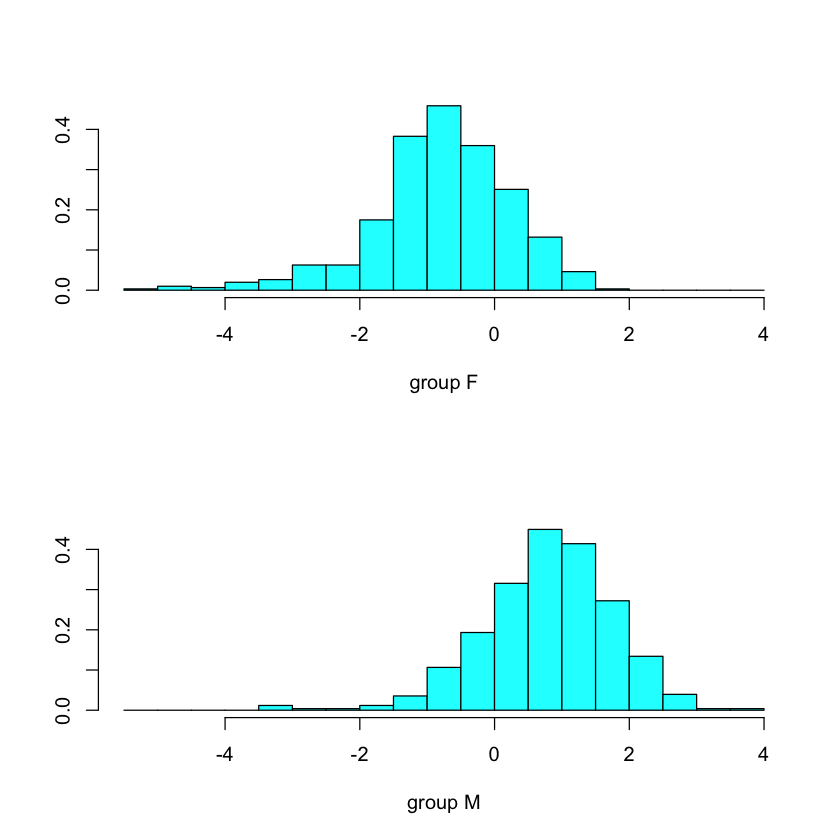

In [33]:
# (f)
library(MASS)
lda<- lda(Gender~FS_IntraCranial_Vol,data=df)
plot(lda)